In [1]:
pip install scipy numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy.io import loadmat

data = loadmat("/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_1.mat")

print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'T', 'dt', 'hora', 'n1', 'n2', 'n3', 'n4'])


In [4]:
# Explore the structure of the data
import numpy as np

print("Data keys:", list(data.keys()))
print("\n" + "="*50)

# Display info about each variable
for key, value in data.items():
    if not key.startswith('__'):  # Skip MATLAB metadata
        print(f"\n{key}:")
        if isinstance(value, np.ndarray):
            print(f"  Shape: {value.shape}")
            print(f"  Type: {value.dtype}")
            print(f"  Min: {value.min()}, Max: {value.max()}")
        else:
            print(f"  Type: {type(value)}")
            print(f"  Value: {value}")

Data keys: ['__header__', '__version__', '__globals__', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'T', 'dt', 'hora', 'n1', 'n2', 'n3', 'n4']


Ch1:
  Shape: (4350016, 1)
  Type: float64
  Min: -0.015116699226400004, Max: 0.04064892576534399

Ch2:
  Shape: (4350016, 1)
  Type: float64
  Min: -7.6855468753776, Max: 7.841796872078401

Ch3:
  Shape: (4350016, 1)
  Type: float64
  Min: -0.0008299804690169601, Max: 0.0035743164058387204

Ch4:
  Shape: (4350016, 1)
  Type: float64
  Min: -0.018549804784639967, Max: 0.022387695211519953

T:
  Shape: (1, 1)
  Type: float64
  Min: 0.034800128, Max: 0.034800128

dt:
  Shape: (1, 1)
  Type: float64
  Min: 8e-09, Max: 8e-09

hora:
  Shape: (1, 6)
  Type: float64
  Min: 4.0, Max: 2023.0

n1:
  Shape: (1, 1)
  Type: uint8
  Min: 1, Max: 1

n2:
  Shape: (1, 1)
  Type: uint8
  Min: 1, Max: 1

n3:
  Shape: (1, 1)
  Type: uint8
  Min: 1, Max: 1

n4:
  Shape: (1, 1)
  Type: uint8
  Min: 1, Max: 1


In [5]:
# Convert ALL data arrays to DataFrame with multiple columns
import pandas as pd

# Extract all arrays
all_arrays = {k: v for k, v in data.items() 
              if isinstance(v, np.ndarray) and not k.startswith('__')}

print(f"Found {len(all_arrays)} arrays:\n")
for key, arr in all_arrays.items():
    print(f"  {key}: shape {arr.shape}")

# Group arrays by their length
arrays_by_length = {}
for key, array in all_arrays.items():
    length = array.shape[0]
    if length not in arrays_by_length:
        arrays_by_length[length] = {}
    arrays_by_length[length][key] = array

print(f"\nArrays grouped by row count:")
for length, arrays in sorted(arrays_by_length.items()):
    print(f"  {length} rows: {list(arrays.keys())}")

# Create DataFrame with the largest arrays (most rows)
largest_length = max(arrays_by_length.keys())
df_all = pd.DataFrame()

print(f"\nCreating DataFrame with {largest_length} rows from main arrays...")

for key, array in arrays_by_length[largest_length].items():
    if array.ndim == 1:
        df_all[key] = array
    elif array.ndim == 2:
        if array.shape[1] == 1:
            # Single column 2D array
            df_all[key] = array.flatten()
        else:
            # Multiple columns
            for i in range(array.shape[1]):
                df_all[f"{key}_{i}"] = array[:, i]

print(f"\nDataFrame shape: {df_all.shape}")
print(f"Columns ({len(df_all.columns)}): {list(df_all.columns)[:10]}...")  # Show first 10
print(f"\nFirst 20 rows:")
print(df_all.head(20))

# Save to CSV
csv_path = "/Users/sadhvinarayanan/Downloads/data_all_columns.csv"
df_all.to_csv(csv_path, index=False)
print(f"\n✓ Saved to CSV: {csv_path}")

# Show metadata about other arrays
if len(arrays_by_length) > 1:
    print(f"\n--- Metadata (smaller arrays) ---")
    for length, arrays in sorted(arrays_by_length.items()):
        if length != largest_length:
            for key, array in arrays.items():
                print(f"{key}: {array.flatten()}")

Found 11 arrays:

  Ch1: shape (4350016, 1)
  Ch2: shape (4350016, 1)
  Ch3: shape (4350016, 1)
  Ch4: shape (4350016, 1)
  T: shape (1, 1)
  dt: shape (1, 1)
  hora: shape (1, 6)
  n1: shape (1, 1)
  n2: shape (1, 1)
  n3: shape (1, 1)
  n4: shape (1, 1)

Arrays grouped by row count:
  1 rows: ['T', 'dt', 'hora', 'n1', 'n2', 'n3', 'n4']
  4350016 rows: ['Ch1', 'Ch2', 'Ch3', 'Ch4']

Creating DataFrame with 4350016 rows from main arrays...

DataFrame shape: (4350016, 4)
Columns (4): ['Ch1', 'Ch2', 'Ch3', 'Ch4']...

First 20 rows:
         Ch1       Ch2           Ch3       Ch4
0   0.000851 -2.373047 -3.896484e-05  0.000640
1   0.001013 -2.509766 -1.268555e-04  0.003198
2   0.001662 -2.431641 -1.455078e-05  0.001919
3   0.000932 -2.470703  4.404297e-05  0.000640
4  -0.000122 -2.431641  1.026367e-04  0.000640
5   0.000122 -2.451172  4.980468e-06 -0.003198
6   0.000608 -2.412109  9.287109e-05  0.004478
7   0.000608 -2.431641  1.954102e-04  0.003198
8   0.000770 -2.431641  1.758789e-04  0.00

In [7]:
# Read and display DataFrame from CSV
import pandas as pd

# Read the CSV file
df = pd.read_csv("/Users/sadhvinarayanan/Downloads/data_all_columns.csv")

print("=" * 100)
print("DATAFRAME VIEW")
print("=" * 100)
print(f"\nShape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")

# Display with better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
df

DATAFRAME VIEW

Shape: (4350016, 4)
Columns: ['Ch1', 'Ch2', 'Ch3', 'Ch4']



,Ch1,Ch2,Ch3,Ch4
0,0.000851,-2.373047,-3.896484e-05,0.000640
1,0.001013,-2.509766,-1.268555e-04,0.003198
2,0.001662,-2.431641,-1.455078e-05,0.001919
3,0.000932,-2.470703,4.404297e-05,0.000640
4,-0.000122,-2.431641,1.026367e-04,0.000640
...,...,...,...,...
4350011,0.000203,1.787109,3.916016e-05,0.010874
4350012,-0.000041,1.630859,1.319336e-04,0.004478
4350013,0.000770,1.669922,1.962891e-05,0.000640
4350014,0.001418,1.767578,9.765596e-08,0.004478


CH1 Data Statistics:
  Total samples: 4350016
  Min value: -0.0151166992264
  Max value: 0.0406489257653439
  Mean value: 0.0006924230053069341
  Std Dev: 0.0006861464904701149


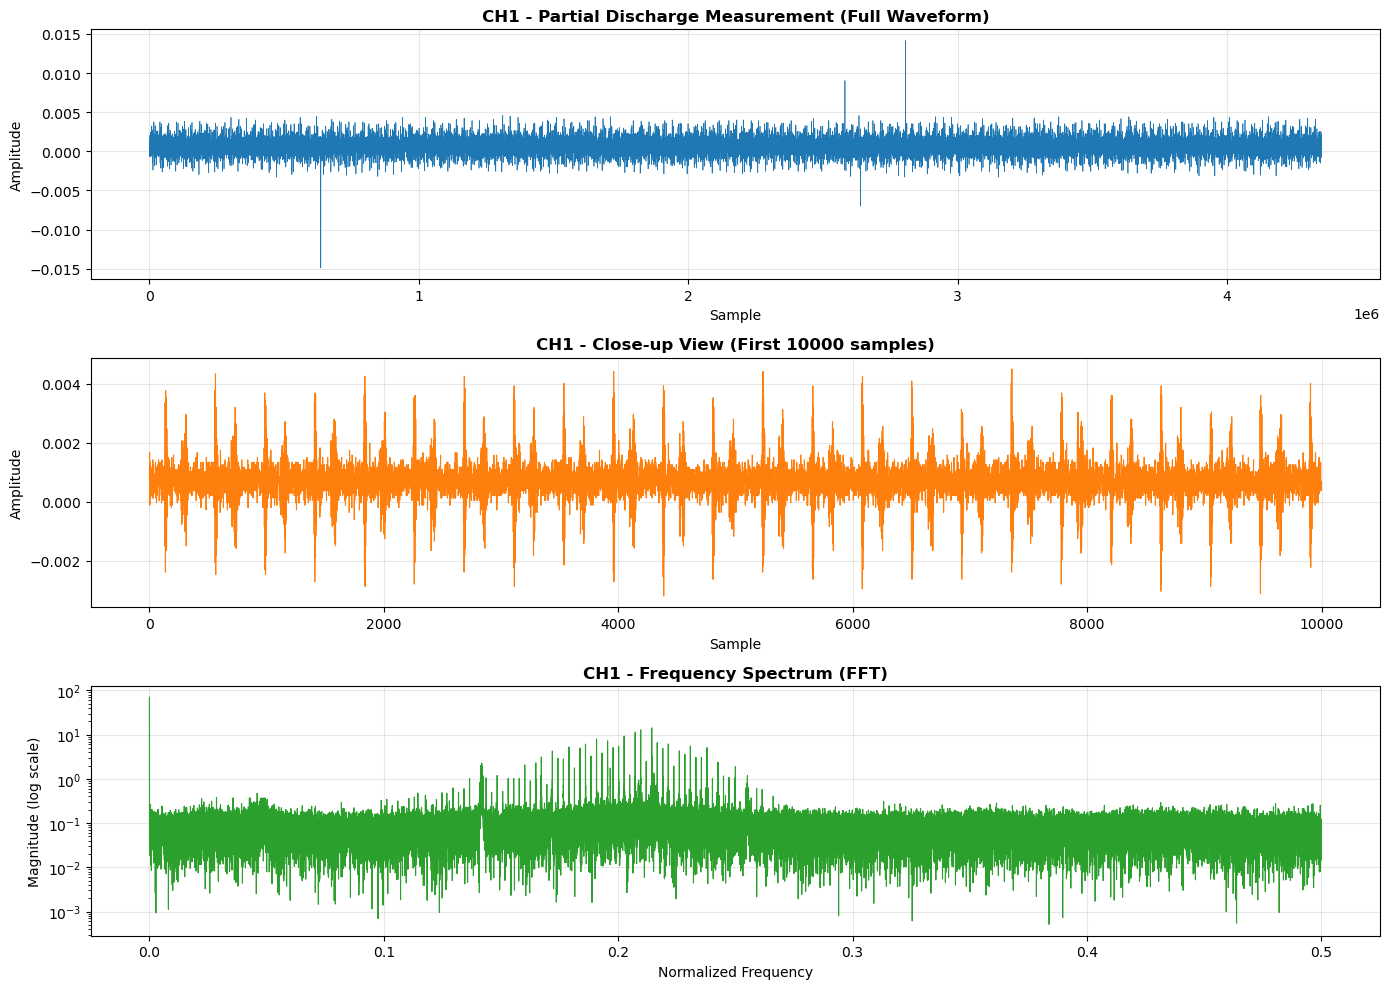


✓ Visualization complete!


In [8]:
# Visualize CH1 Partial Discharge Data
import matplotlib.pyplot as plt
import numpy as np

# Extract CH1 data
ch1_data = df['Ch1'].values

print(f"CH1 Data Statistics:")
print(f"  Total samples: {len(ch1_data)}")
print(f"  Min value: {ch1_data.min()}")
print(f"  Max value: {ch1_data.max()}")
print(f"  Mean value: {ch1_data.mean()}")
print(f"  Std Dev: {ch1_data.std()}")

# Create multiple visualizations
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# 1. Full waveform (downsampled for visibility)
downsample_factor = 100
downsampled = ch1_data[::downsample_factor]
time_axis = np.arange(len(downsampled)) * downsample_factor

axes[0].plot(time_axis, downsampled, linewidth=0.5, color='#1f77b4')
axes[0].set_title('CH1 - Partial Discharge Measurement (Full Waveform)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)

# 2. Close-up of first 10000 samples
samples_to_show = 10000
axes[1].plot(ch1_data[:samples_to_show], linewidth=0.8, color='#ff7f0e')
axes[1].set_title(f'CH1 - Close-up View (First {samples_to_show} samples)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sample')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True, alpha=0.3)

# 3. Frequency spectrum (FFT)
fft_result = np.fft.fft(ch1_data[:100000])  # Use first 100k samples for FFT
frequencies = np.fft.fftfreq(len(fft_result))
magnitude = np.abs(fft_result)

axes[2].semilogy(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], linewidth=0.8, color='#2ca02c')
axes[2].set_title('CH1 - Frequency Spectrum (FFT)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Normalized Frequency')
axes[2].set_ylabel('Magnitude (log scale)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Visualization complete!")

Spike Detection Results:
  Total spikes detected: 34043
  Positive peaks (> +3σ): 16707
  Negative peaks (< -3σ): 17336
  Spike density: 0.78%


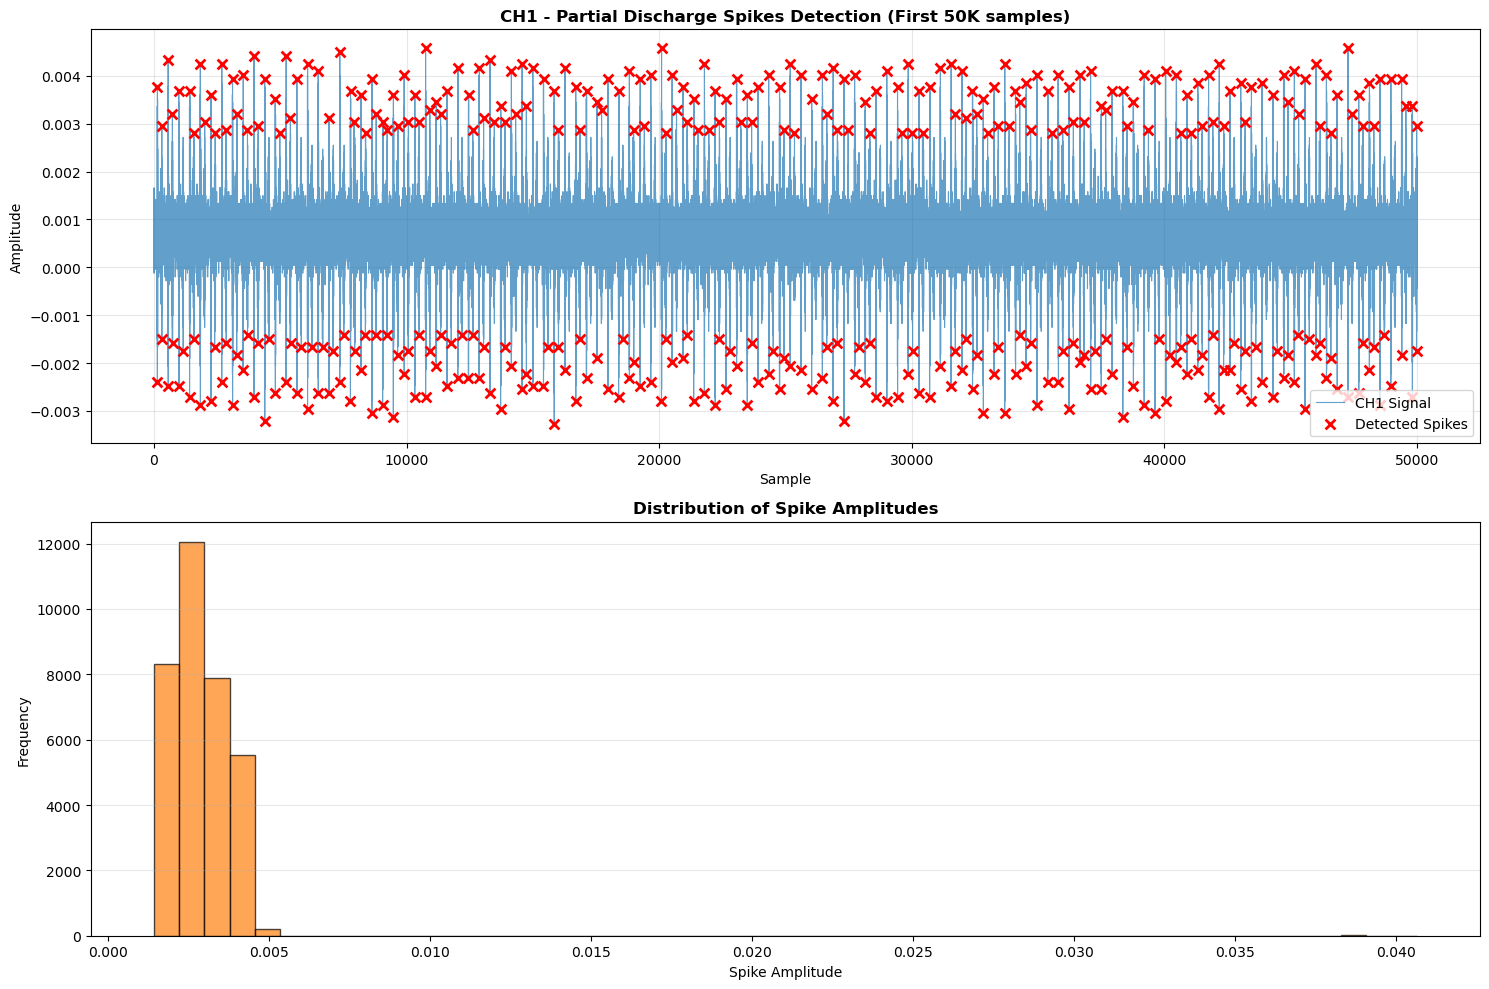


Spike Amplitude Statistics:
  Mean spike amplitude: 0.00
  Max spike amplitude: 0.04
  Min spike amplitude: 0.00
  Median spike amplitude: 0.00

Top 10 Largest Spikes:
  1. Sample  2581596 - Amplitude:       0.04
  2. Sample   657255 - Amplitude:       0.04
  3. Sample  2806495 - Amplitude:       0.04
  4. Sample   596386 - Amplitude:       0.04
  5. Sample  2677410 - Amplitude:       0.04
  6. Sample  2639088 - Amplitude:       0.04
  7. Sample   496938 - Amplitude:       0.04
  8. Sample  2620249 - Amplitude:       0.04
  9. Sample   538027 - Amplitude:       0.04
  10. Sample  2780176 - Amplitude:       0.04


In [9]:
# Detect and Visualize Partial Discharge Spikes
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Extract CH1 data
ch1_data = df['Ch1'].values

# Normalize the data
ch1_normalized = (ch1_data - ch1_data.mean()) / ch1_data.std()

# Detect spikes using multiple methods
# Method 1: Peak detection with threshold
threshold = 3  # Standard deviations from mean
peaks_high, _ = find_peaks(ch1_normalized, height=threshold, distance=100)
peaks_low, _ = find_peaks(-ch1_normalized, height=threshold, distance=100)
all_peaks = np.sort(np.concatenate([peaks_high, peaks_low]))

print(f"Spike Detection Results:")
print(f"  Total spikes detected: {len(all_peaks)}")
print(f"  Positive peaks (> +3σ): {len(peaks_high)}")
print(f"  Negative peaks (< -3σ): {len(peaks_low)}")
print(f"  Spike density: {len(all_peaks) / len(ch1_data) * 100:.2f}%")

# Create visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: First 50000 samples with detected spikes
samples_view = 50000
axes[0].plot(ch1_data[:samples_view], linewidth=0.8, label='CH1 Signal', color='#1f77b4', alpha=0.7)

# Highlight spikes in this view
spikes_in_view = all_peaks[all_peaks < samples_view]
spike_values = ch1_data[spikes_in_view]
axes[0].scatter(spikes_in_view, spike_values, color='red', s=50, marker='x', linewidth=2, label='Detected Spikes', zorder=5)

axes[0].set_title('CH1 - Partial Discharge Spikes Detection (First 50K samples)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Spike amplitude distribution
spike_amplitudes = np.abs(ch1_data[all_peaks])
axes[1].hist(spike_amplitudes, bins=50, color='#ff7f0e', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Spike Amplitudes', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Spike Amplitude')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print spike statistics
print(f"\nSpike Amplitude Statistics:")
print(f"  Mean spike amplitude: {spike_amplitudes.mean():.2f}")
print(f"  Max spike amplitude: {spike_amplitudes.max():.2f}")
print(f"  Min spike amplitude: {spike_amplitudes.min():.2f}")
print(f"  Median spike amplitude: {np.median(spike_amplitudes):.2f}")

# Show locations of largest spikes
print(f"\nTop 10 Largest Spikes:")
top_indices = np.argsort(spike_amplitudes)[-10:][::-1]
for i, idx in enumerate(top_indices, 1):
    spike_idx = all_peaks[idx]
    print(f"  {i}. Sample {spike_idx:>8d} - Amplitude: {ch1_data[spike_idx]:>10.2f}")

VISUALIZATION FUNCTION

In [10]:
# Define a reusable function to load and analyze MATLAB data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import find_peaks

def analyze_matlab_data(file_path, channel='Ch1', threshold=3, visualize=True):
    """
    Load MATLAB file, create visualizations, and detect partial discharge spikes.
    
    Parameters:
    -----------
    file_path : str
        Path to the .mat file
    channel : str
        Channel to analyze (default: 'Ch1')
    threshold : float
        Spike detection threshold in standard deviations (default: 3)
    visualize : bool
        Whether to display plots (default: True)
    
    Returns:
    --------
    df : pd.DataFrame
        DataFrame containing all channel data
    spike_info : dict
        Dictionary with spike detection results
    """
    
    # Load MATLAB file
    print(f"Loading: {file_path}")
    data = loadmat(file_path)
    
    # Extract all arrays
    all_arrays = {k: v for k, v in data.items() 
                  if isinstance(v, np.ndarray) and not k.startswith('__')}
    
    # Group arrays by length
    arrays_by_length = {}
    for key, array in all_arrays.items():
        length = array.shape[0]
        if length not in arrays_by_length:
            arrays_by_length[length] = {}
        arrays_by_length[length][key] = array
    
    # Create DataFrame with largest arrays
    largest_length = max(arrays_by_length.keys())
    df = pd.DataFrame()
    
    for key, array in arrays_by_length[largest_length].items():
        if array.ndim == 1:
            df[key] = array
        elif array.ndim == 2:
            if array.shape[1] == 1:
                df[key] = array.flatten()
            else:
                for i in range(array.shape[1]):
                    df[f"{key}_{i}"] = array[:, i]
    
    print(f"✓ DataFrame created: {df.shape}")
    
    # Extract channel data
    if channel not in df.columns:
        raise ValueError(f"Channel '{channel}' not found. Available: {list(df.columns)}")
    
    ch_data = df[channel].values
    ch_normalized = (ch_data - ch_data.mean()) / ch_data.std()
    
    # Detect spikes
    peaks_high, _ = find_peaks(ch_normalized, height=threshold, distance=100)
    peaks_low, _ = find_peaks(-ch_normalized, height=threshold, distance=100)
    all_peaks = np.sort(np.concatenate([peaks_high, peaks_low]))
    spike_amplitudes = np.abs(ch_data[all_peaks])
    
    spike_info = {
        'total_spikes': len(all_peaks),
        'positive_peaks': len(peaks_high),
        'negative_peaks': len(peaks_low),
        'spike_density': len(all_peaks) / len(ch_data) * 100,
        'mean_amplitude': spike_amplitudes.mean(),
        'max_amplitude': spike_amplitudes.max(),
        'min_amplitude': spike_amplitudes.min(),
        'peak_indices': all_peaks,
        'peak_amplitudes': spike_amplitudes
    }
    
    print(f"\n{channel} Analysis:")
    print(f"  Total samples: {len(ch_data)}")
    print(f"  Spikes detected: {spike_info['total_spikes']}")
    print(f"  Spike density: {spike_info['spike_density']:.2f}%")
    print(f"  Mean spike amplitude: {spike_info['mean_amplitude']:.2f}")
    
    # Create visualizations
    if visualize:
        fig = plt.figure(figsize=(16, 12))
        gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
        
        # 1. Full waveform
        ax1 = fig.add_subplot(gs[0, :])
        downsample_factor = 100
        downsampled = ch_data[::downsample_factor]
        time_axis = np.arange(len(downsampled)) * downsample_factor
        ax1.plot(time_axis, downsampled, linewidth=0.5, color='#1f77b4')
        ax1.set_title(f'{channel} - Full Waveform', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Sample')
        ax1.set_ylabel('Amplitude')
        ax1.grid(True, alpha=0.3)
        
        # 2. Close-up with spikes
        ax2 = fig.add_subplot(gs[1, 0])
        samples_view = 50000
        ax2.plot(ch_data[:samples_view], linewidth=0.8, label=f'{channel} Signal', color='#1f77b4', alpha=0.7)
        spikes_in_view = all_peaks[all_peaks < samples_view]
        if len(spikes_in_view) > 0:
            ax2.scatter(spikes_in_view, ch_data[spikes_in_view], color='red', s=50, marker='x', linewidth=2, label='Spikes', zorder=5)
        ax2.set_title(f'{channel} - Close-up with Spike Detection (First 50K samples)', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Sample')
        ax2.set_ylabel('Amplitude')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Spike amplitude distribution
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.hist(spike_amplitudes, bins=50, color='#ff7f0e', edgecolor='black', alpha=0.7)
        ax3.set_title('Spike Amplitude Distribution', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Spike Amplitude')
        ax3.set_ylabel('Frequency')
        ax3.grid(True, alpha=0.3, axis='y')
        
        # 4. Frequency spectrum
        ax4 = fig.add_subplot(gs[2, :])
        fft_result = np.fft.fft(ch_data[:100000])
        frequencies = np.fft.fftfreq(len(fft_result))
        magnitude = np.abs(fft_result)
        ax4.semilogy(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], linewidth=0.8, color='#2ca02c')
        ax4.set_title(f'{channel} - Frequency Spectrum (FFT)', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Normalized Frequency')
        ax4.set_ylabel('Magnitude (log scale)')
        ax4.grid(True, alpha=0.3)
        
        plt.show()
        print("\n✓ Visualizations complete!")
    
    return df, spike_info

# Example usage (uncomment to run):
# df, spike_info = analyze_matlab_data("/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_1.mat")

Loading: /Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_1.mat
✓ DataFrame created: (4350016, 4)

Ch1 Analysis:
  Total samples: 4350016
  Spikes detected: 34043
  Spike density: 0.78%
  Mean spike amplitude: 0.00
✓ DataFrame created: (4350016, 4)

Ch1 Analysis:
  Total samples: 4350016
  Spikes detected: 34043
  Spike density: 0.78%
  Mean spike amplitude: 0.00


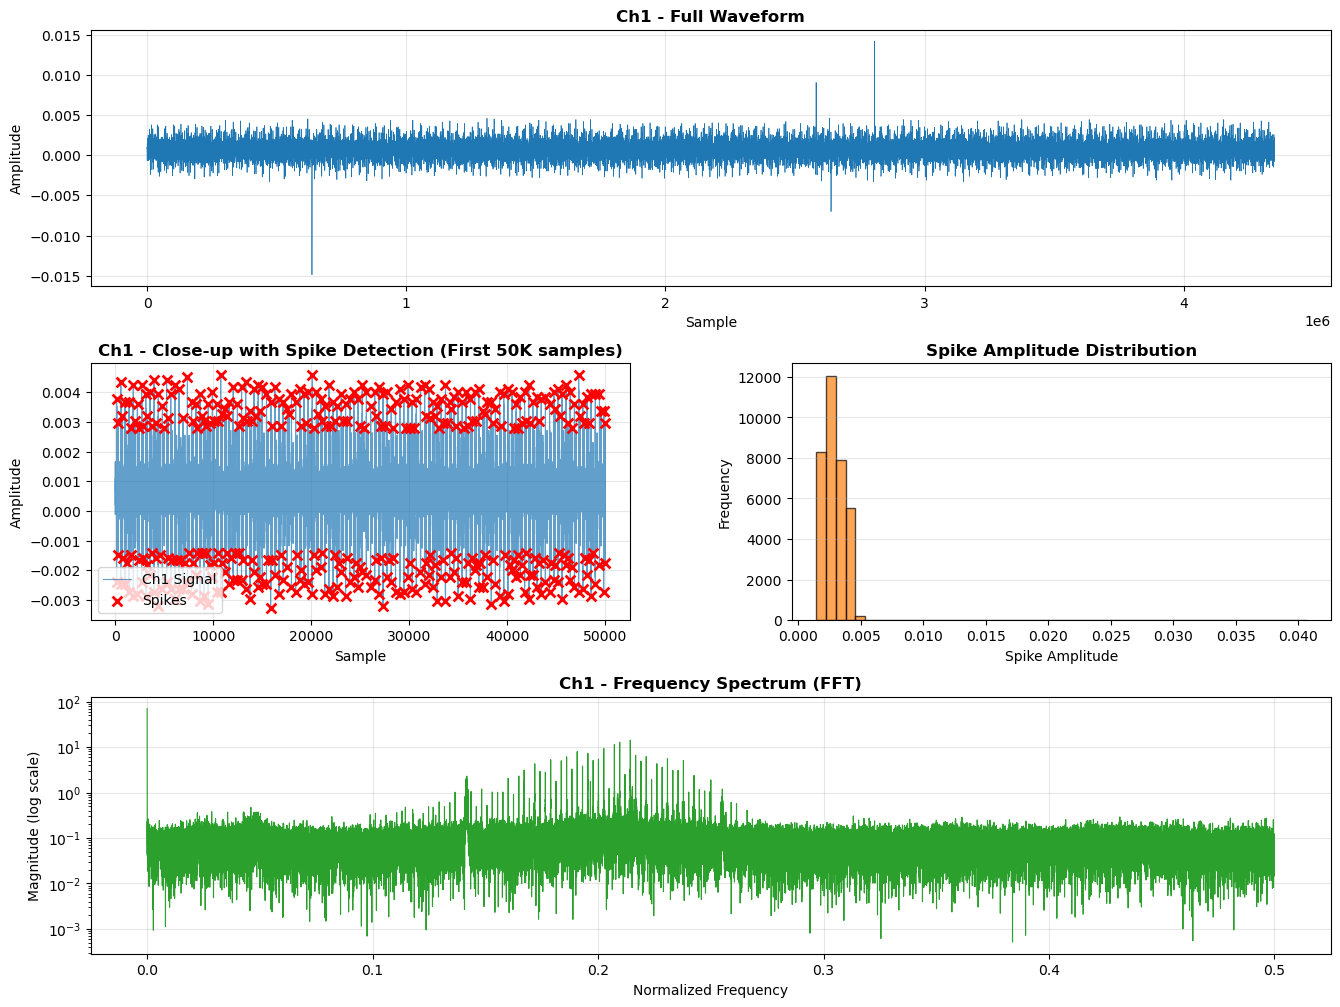


✓ Visualizations complete!


(              Ch1       Ch2           Ch3       Ch4
 0        0.000851 -2.373047 -3.896484e-05  0.000640
 1        0.001013 -2.509766 -1.268555e-04  0.003198
 2        0.001662 -2.431641 -1.455078e-05  0.001919
 3        0.000932 -2.470703  4.404297e-05  0.000640
 4       -0.000122 -2.431641  1.026367e-04  0.000640
 ...           ...       ...           ...       ...
 4350011  0.000203  1.787109  3.916016e-05  0.010874
 4350012 -0.000041  1.630859  1.319336e-04  0.004478
 4350013  0.000770  1.669922  1.962891e-05  0.000640
 4350014  0.001418  1.767578  9.765596e-08  0.004478
 4350015  0.000770  1.748047  9.863281e-06  0.005757
 
 [4350016 rows x 4 columns],
 {'total_spikes': 34043,
  'positive_peaks': 16707,
  'negative_peaks': 17336,
  'spike_density': 0.7825948226397329,
  'mean_amplitude': 0.002871062840434322,
  'max_amplitude': 0.04064892576534399,
  'min_amplitude': 0.001418457040928002,
  'peak_indices': array([    137,     139,     312, ..., 4349631, 4349797, 4349799]),
  'pea

In [11]:
analyze_matlab_data("/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_1.mat")

Loading: /Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_2.mat
✓ DataFrame created: (4350016, 4)

Ch1 Analysis:
  Total samples: 4350016
  Spikes detected: 34225
  Spike density: 0.79%
  Mean spike amplitude: 0.00
✓ DataFrame created: (4350016, 4)

Ch1 Analysis:
  Total samples: 4350016
  Spikes detected: 34225
  Spike density: 0.79%
  Mean spike amplitude: 0.00


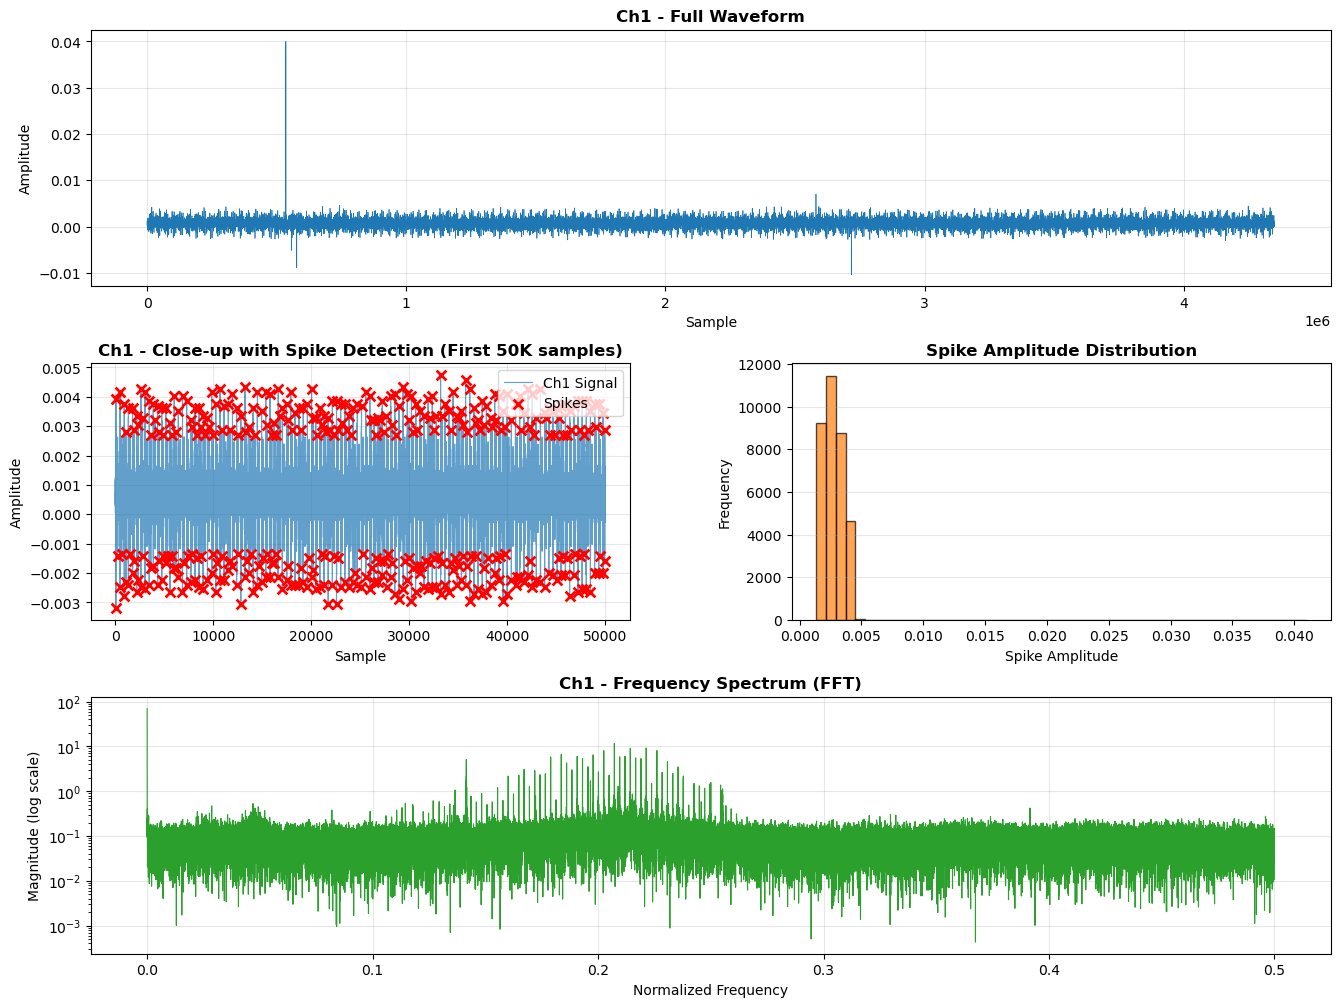


✓ Visualizations complete!


(              Ch1       Ch2       Ch3       Ch4
 0        0.000365 -2.333984  0.000020  0.000640
 1        0.001175 -2.294922 -0.000044  0.009595
 2        0.000932 -2.392578  0.000093  0.000640
 3        0.001256 -2.392578 -0.000083  0.008315
 4        0.000446 -2.392578  0.000015 -0.000640
 ...           ...       ...       ...       ...
 4350011  0.000203  1.689453  0.000137 -0.000640
 4350012  0.001256  1.787109  0.000147  0.008315
 4350013  0.001013  1.748047  0.000117  0.000640
 4350014  0.000770  1.787109  0.000054  0.013433
 4350015  0.000203  1.728516 -0.000073  0.010874
 
 [4350016 rows x 4 columns],
 {'total_spikes': 34225,
  'positive_peaks': 16917,
  'negative_peaks': 17308,
  'spike_density': 0.7867787152966793,
  'mean_amplitude': 0.002741932651848188,
  'max_amplitude': 0.040973144515295996,
  'min_amplitude': 0.001337402353440001,
  'peak_indices': array([     63,      65,     235, ..., 4349710, 4349960, 4349962]),
  'peak_amplitudes': array([0.00320166, 0.00393115, 0

In [12]:
analyze_matlab_data("/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_2.mat")

Loading: /Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_3.mat
✓ DataFrame created: (4350016, 4)

Ch1 Analysis:
  Total samples: 4350016
  Spikes detected: 35391
  Spike density: 0.81%
  Mean spike amplitude: 0.00
✓ DataFrame created: (4350016, 4)

Ch1 Analysis:
  Total samples: 4350016
  Spikes detected: 35391
  Spike density: 0.81%
  Mean spike amplitude: 0.00


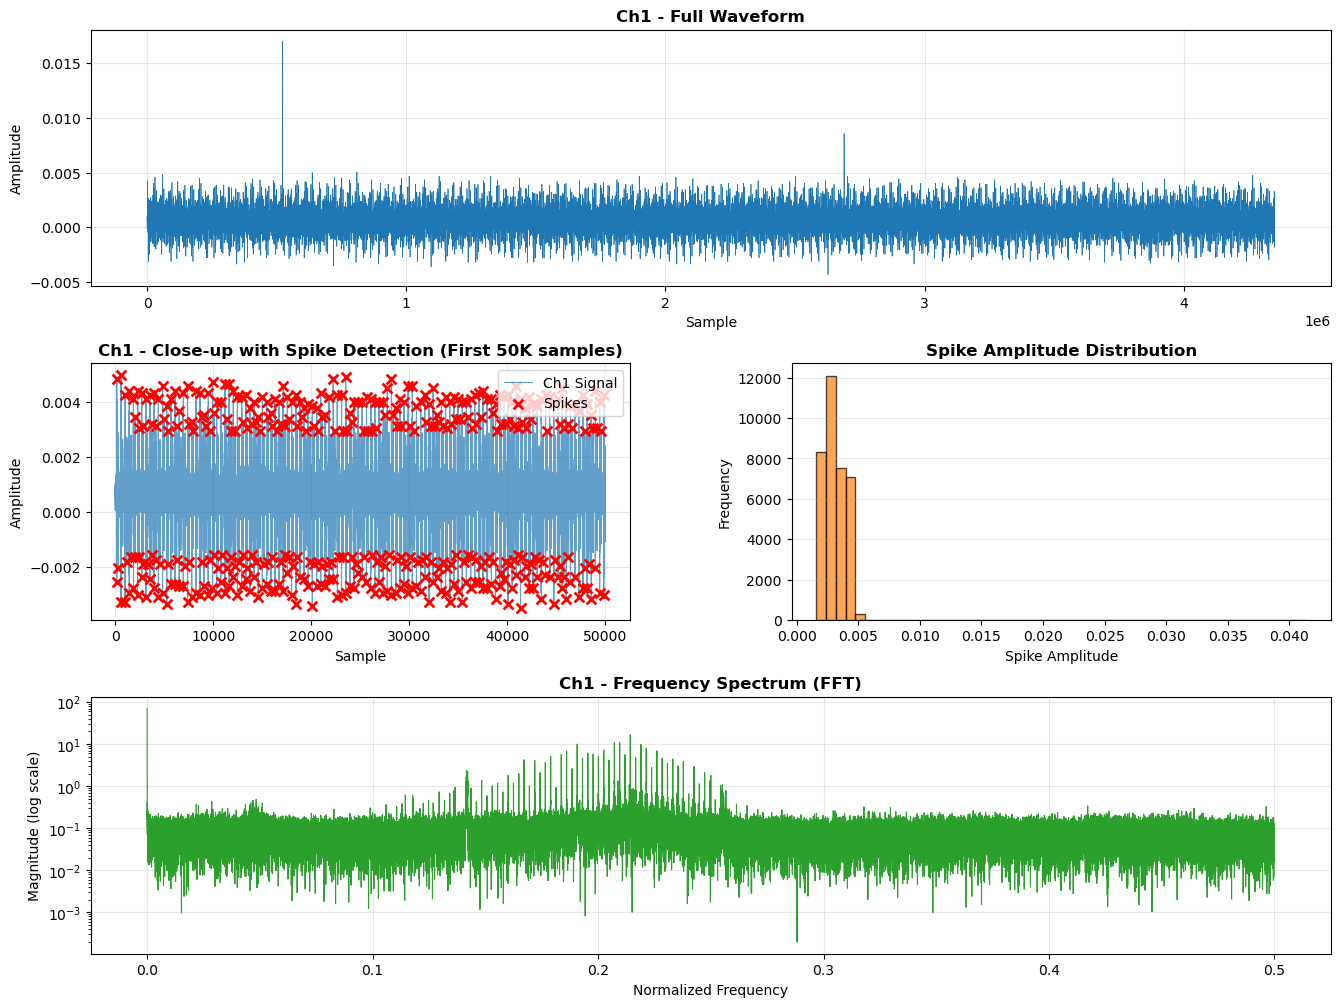


✓ Visualizations complete!


(              Ch1       Ch2           Ch3       Ch4
 0        0.000527 -2.333984  7.333984e-05  0.003198
 1        0.000932 -2.314453  7.822266e-05 -0.005757
 2        0.000527 -2.373047  5.380859e-05  0.004478
 3        0.000932 -2.294922 -9.667969e-06  0.001919
 4        0.000041 -2.392578  8.310547e-05  0.000640
 ...           ...       ...           ...       ...
 4350011  0.001500  1.728516  9.765596e-08  0.001919
 4350012  0.001175  1.806641  1.075195e-04 -0.000640
 4350013  0.000608  1.767578  8.310547e-05 -0.000640
 4350014  0.000284  1.708984  7.333984e-05  0.008315
 4350015  0.000851  1.708984  6.357422e-05  0.009595
 
 [4350016 rows x 4 columns],
 {'total_spikes': 35391,
  'positive_peaks': 17365,
  'negative_peaks': 18026,
  'spike_density': 0.8135832144065677,
  'mean_amplitude': 0.003082829875371973,
  'max_amplitude': 0.041378417952735995,
  'min_amplitude': 0.0015805664159040042,
  'peak_indices': array([    151,     154,     322, ..., 4349634, 4349795, 4349802]),
  'p

In [13]:
analyze_matlab_data("/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_3.mat")

COMPARISON OF ALL 6 MATLAB FILES

                    File Channel  Samples       Min      Max     Mean  Std Dev      RMS
Aq01_pontaaterrada_1.mat     Ch1  4350016 -0.015117 0.040649 0.000692 0.000686 0.000975
Aq01_pontaaterrada_1.mat     Ch2  4350016 -7.685547 7.841797 0.060928 5.369008 5.369354
Aq01_pontaaterrada_1.mat     Ch3  4350016 -0.000830 0.003574 0.000031 0.000079 0.000085
Aq01_pontaaterrada_1.mat     Ch4  4350016 -0.018550 0.022388 0.003207 0.004079 0.005189
Aq01_pontaaterrada_2.mat     Ch1  4350016 -0.015684 0.040973 0.000695 0.000659 0.000958
Aq01_pontaaterrada_2.mat     Ch2  4350016 -7.705078 7.861328 0.064417 5.374574 5.374960
Aq01_pontaaterrada_2.mat     Ch3  4350016 -0.000786 0.003501 0.000033 0.000078 0.000084
Aq01_pontaaterrada_2.mat     Ch4  4350016 -0.018550 0.022388 0.002694 0.004091 0.004898
Aq01_pontaaterrada_3.mat     Ch1  4350016 -0.016170 0.041378 0.000689 0.000732 0.001005
Aq01_pontaaterrada_3.mat     Ch2  4350016 -7.705078 7.861328 0.060328 5.366973 5.36731

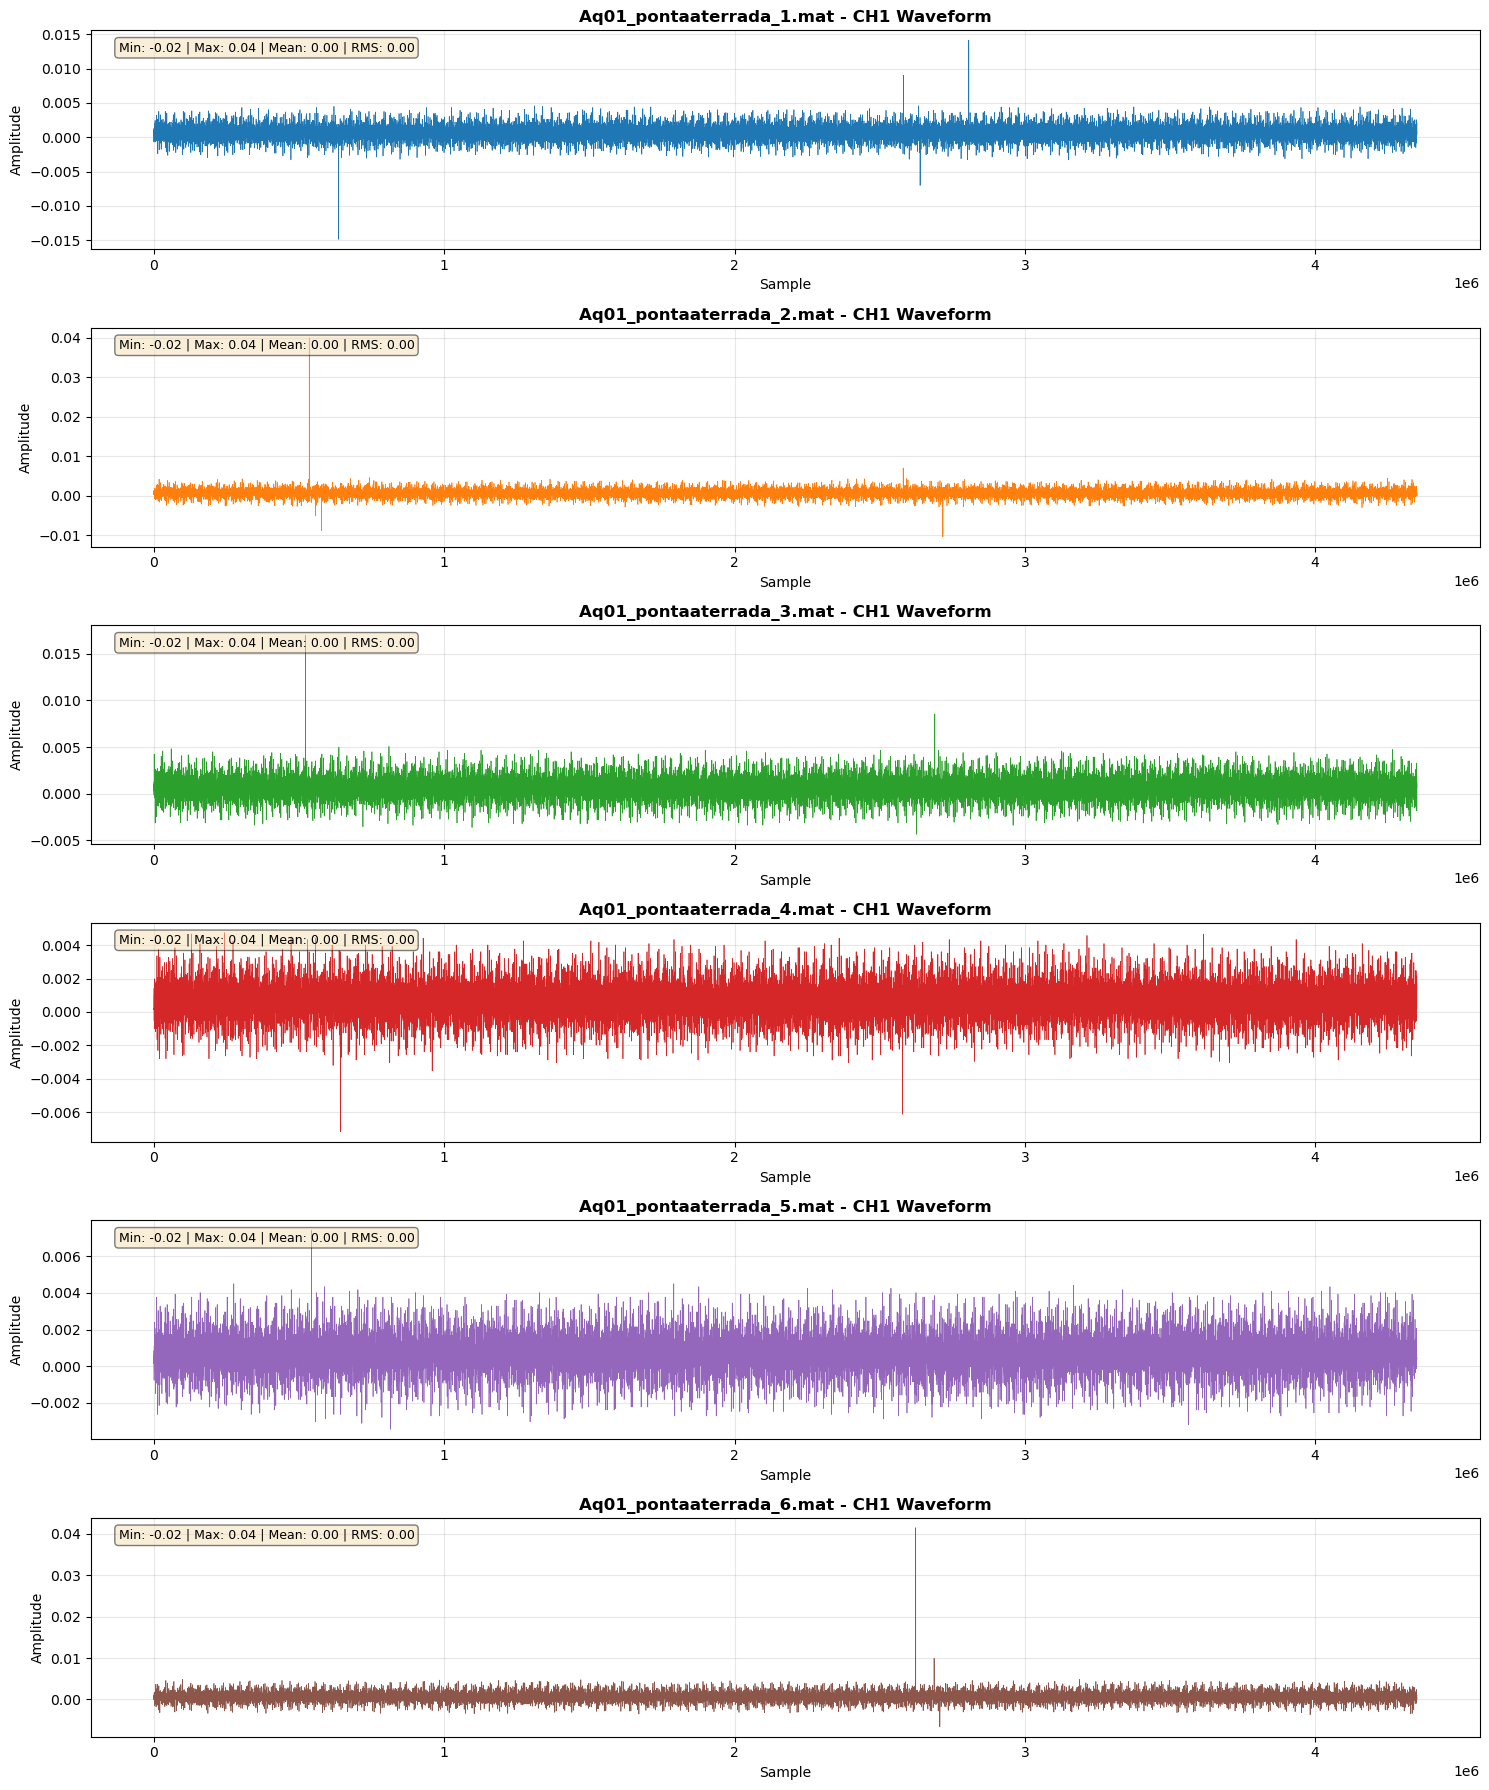


SPIKE DETECTION COMPARISON (Ch1, threshold=3σ)

                    File  Total Spikes  Positive Peaks  Negative Peaks  Spike Density (%)  Mean Spike Amp  Max Spike Amp
Aq01_pontaaterrada_1.mat         34043           16707           17336           0.782595        0.002871       0.040649
Aq01_pontaaterrada_2.mat         34225           16917           17308           0.786779        0.002742       0.040973
Aq01_pontaaterrada_3.mat         35391           17365           18026           0.813583        0.003083       0.041378
Aq01_pontaaterrada_4.mat         34909           16719           18190           0.802503        0.002798       0.041459
Aq01_pontaaterrada_5.mat         34663           16583           18080           0.796848        0.002787       0.040730
Aq01_pontaaterrada_6.mat         36137           17895           18242           0.830733        0.003110       0.041459

✓ Comparison complete!

                    File  Total Spikes  Positive Peaks  Negative Peaks  Spike D

In [ ]:
# Compare all 3 MATLAB files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

file_paths = [
    "/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_1.mat",
    "/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_2.mat",
    "/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_3.mat",
    "/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_4.mat",
    "/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_5.mat",
    "/Users/sadhvinarayanan/Downloads/Aq01_pontaaterrada_6.mat"
]

results = {}

# Load and analyze each file
for file_path in file_paths:
    file_name = file_path.split('/')[-1]
    data = loadmat(file_path)
    
    all_arrays = {k: v for k, v in data.items() 
                  if isinstance(v, np.ndarray) and not k.startswith('__')}
    
    # Get metadata
    arrays_by_length = {}
    for key, array in all_arrays.items():
        length = array.shape[0]
        if length not in arrays_by_length:
            arrays_by_length[length] = {}
        arrays_by_length[length][key] = array
    
    largest_length = max(arrays_by_length.keys())
    
    results[file_name] = {
        'data': all_arrays,
        'arrays_by_length': arrays_by_length,
        'largest_length': largest_length,
        'channels': [k for k in arrays_by_length[largest_length].keys()]
    }

# Create comparison table
print("=" * 100)
print(f"COMPARISON OF ALL {len(file_paths)} MATLAB FILES")
print("=" * 100)

comparison_data = []
for file_name, info in results.items():
    ch_names = info['channels']
    
    # Get stats for each channel
    for ch in ch_names:
        ch_data = info['data'][ch].flatten()
        comparison_data.append({
            'File': file_name,
            'Channel': ch,
            'Samples': len(ch_data),
            'Min': ch_data.min(),
            'Max': ch_data.max(),
            'Mean': ch_data.mean(),
            'Std Dev': ch_data.std(),
            'RMS': np.sqrt(np.mean(ch_data**2))
        })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Detailed statistics per file
print("\n" + "=" * 100)
print("DETAILED STATISTICS PER FILE")
print("=" * 100)

for file_name, info in results.items():
    print(f"\n{file_name}:")
    print(f"  Total channels: {len(info['channels'])}")
    print(f"  Channels: {info['channels']}")
    print(f"  Samples per channel: {info['largest_length']:,}")

# Visualize all files (Ch1 from each file) - create proper number of subplots
num_files = len(file_paths)
fig, axes = plt.subplots(num_files, 1, figsize=(15, 3*num_files))

# Ensure axes is always iterable
if num_files == 1:
    axes = [axes]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, file_path in enumerate(file_paths):
    file_name = file_path.split('/')[-1]
    ch1_data = results[file_name]['data']['Ch1'].flatten()
    
    # Downsample for visualization
    downsample_factor = 100
    downsampled = ch1_data[::downsample_factor]
    time_axis = np.arange(len(downsampled)) * downsample_factor
    
    axes[idx].plot(time_axis, downsampled, linewidth=0.5, color=colors[idx])
    axes[idx].set_title(f'{file_name} - CH1 Waveform', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Sample')
    axes[idx].set_ylabel('Amplitude')
    axes[idx].grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f"Min: {ch1_data.min():.2f} | Max: {ch1_data.max():.2f} | Mean: {ch1_data.mean():.2f} | RMS: {np.sqrt(np.mean(ch1_data**2)):.2f}"
    axes[idx].text(0.02, 0.95, stats_text, transform=axes[idx].transAxes, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)

plt.tight_layout()
plt.show()

# Compare spike characteristics
print("\n" + "=" * 100)
print("SPIKE DETECTION COMPARISON (Ch1, threshold=3σ)")
print("=" * 100)

from scipy.signal import find_peaks

spike_comparison = []
for file_path in file_paths:
    file_name = file_path.split('/')[-1] 
    ch1_data = results[file_name]['data']['Ch1'].flatten()
    ch1_normalized = (ch1_data - ch1_data.mean()) / ch1_data.std()
    
    threshold = 3
    peaks_high, _ = find_peaks(ch1_normalized, height=threshold, distance=100)
    peaks_low, _ = find_peaks(-ch1_normalized, height=threshold, distance=100)
    all_peaks = np.sort(np.concatenate([peaks_high, peaks_low]))
    spike_amps = np.abs(ch1_data[all_peaks])
    
    spike_comparison.append({
        'File': file_name, 
        'Total Spikes': len(all_peaks),
        'Positive Peaks': len(peaks_high),
        'Negative Peaks': len(peaks_low),
        'Spike Density (%)': len(all_peaks) / len(ch1_data) * 100,
        'Mean Spike Amp': spike_amps.mean() if len(spike_amps) > 0 else 0,
        'Max Spike Amp': spike_amps.max() if len(spike_amps) > 0 else 0
    })

spike_df = pd.DataFrame(spike_comparison)
print("\n" + spike_df.to_string(index=False))

print("\n✓ Comparison complete!")